# GTZAN - Deep Learning

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres:-
- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock


# Reading & Understanding Data
## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [39]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


### Loading Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df.head()

### About the dataset

In [ ]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

# Data Visualization

In [ ]:
audio_fp = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [ ]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

In [ ]:
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

In [ ]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

In [ ]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

In [ ]:
mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

In [ ]:
chroma = librosa.feature.chroma_stft(audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

In [ ]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [ ]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [ ]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [ ]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

In [ ]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

# Split Train, Dev & Test Sets

In [ ]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [ ]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [ ]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

In [ ]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

## Scale the Features

In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Model Building

In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

In [ ]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [ ]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

In [ ]:
plotHistory(model_1_history)

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

In [ ]:
plotHistory(model_2_history)

In [ ]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

In [ ]:
plotHistory(model_3_history)

In [34]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              59392     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)              

Max. Validation Accuracy 0.9398382306098938


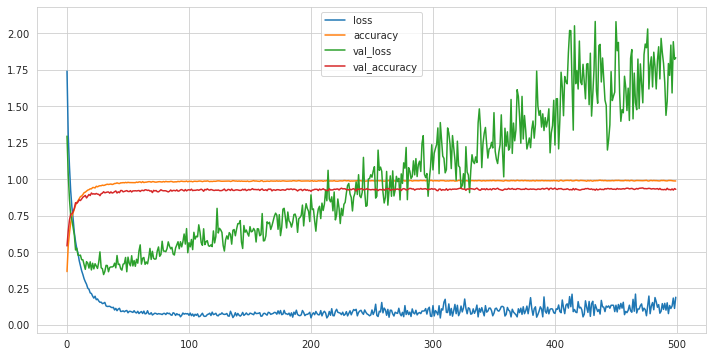

In [35]:
plotHistory(model_4_history)

# Model Evaluation

In [36]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 [==============================] - 0s 2ms/step - loss: 1.4250 - accuracy: 0.9225
The test Loss is : 1.424953818321228

The Best test Accuracy is : 92.24730134010315


# Transfer to our data

In [41]:
!apt install -y zip unzip
!pip install -q librosa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 108 not upgraded.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [56]:
# Cloud Storage
from google.cloud import storage

bucket_name = 'ml-bucket-isikus'
prefix = 'coursework/'
dl_dir = './'

storage_client = storage.Client(project='better-record')
bucket = storage_client.get_bucket(bucket_name)
blobs = bucket.list_blobs(prefix=prefix)  # Get list of files
for blob in blobs:
    if not blob.name.endswith("/"):
        fname = dl_dir + blob.name[len(prefix):]
        !install -Dv /dev/null {fname}
        blob.download_to_filename(fname)  # Download

!unzip -q selected_jingles.zip
!mkdir sj
!mv selected_jingles sj

'/dev/null' -> './selected_jingles.zip'


In [45]:
!wget -q https://github.com/SunghoonSeok/aistudy/raw/main/test/music_classification/make_csv.py

In [58]:
from make_csv import Song_to_csv
predict = Song_to_csv('sj/', 'jingle_analyze.csv', is_train=False, in_folder=True)
predict.make_csv()
predict.fill_csv()

['normalno_zhe_obschalis_jingle.wav', 'deshifrator_jingle.wav', 'kak_v_zhizni_jingle.mp3', 'biohaking_radio_jingle.mp3', 'dengi_delajut_dengi_jingle.wav', 'istorija_roskoshi_jingle.wav', 'davaj_sprosim_u_italjantsa_jingle.mp3', 'tri_kaleki_jingle.mp3', 'protelo_jingle.wav', 'chto_izmenilos_jingle.mp3', 'tjazhelovato_jingle.wav', 'eto_anglija_jingle.wav', 'metabolic_daria_pohudenie_biohaking_optimizatsija_zhizni_jingle.mp3', 'litsa_poprosche_jingle.mp3', 'russkij_albom_jingle.wav', 'litsa_poprosche_jingle.wav', 'seks_s_mari_jingle.mp3', 'zakat_imperii_jingle.wav', 'podorozhnik_jingle.mp3', 'skazki_elby_jingle.mp3', 'v_zaschite_pouzhe_jingle.wav', 'audit_jingle.mp3', 'polka_jingle.mp3', 'ot_hora_do_hardkora_jingle.wav', 'naked_science_jingle.wav', 'kak_v_zhizni_jingle.wav', 'tandemokratija_jingle.mp3', 'kak_eto_rabotaet_jingle.mp3', 'normalnye_dengi_jingle.wav', 'putevoditel_po_vselennym_jingle.wav', 'pokolenie_zero_jingle.mp3', 'krik_dzhokondy_jingle.wav', 'audit_jingle.wav', 'podorozhn

In [59]:
jdf = pd.read_csv("jingle_analyze.csv")
jdf

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,normalno_zhe_obschalis_jingle,351495.0,0.567881,0.074107,0.087740,0.001714,688.093170,2.308904e+05,1266.705157,2.612199e+05,...,-15.303746,120.807106,-11.080976,82.518105,-2.459568,46.498436,-0.479365,56.792110,-4.237254,62.725204
1,deshifrator_jingle,525658.0,0.640699,0.064034,0.157293,0.005136,993.316290,5.625787e+05,1678.988474,8.282214e+05,...,3.792531,29.523750,2.034780,31.474398,-1.019666,22.421761,-0.142154,24.348820,-1.584625,32.485264
2,kak_v_zhizni_jingle,529805.0,0.537416,0.084350,0.099983,0.004336,2574.951135,2.059233e+06,2988.075425,6.887494e+05,...,-6.030697,60.193802,-0.135805,40.160229,-2.111958,52.076103,1.806786,37.060383,-4.369891,51.508194
3,biohaking_radio_jingle,586777.0,0.503953,0.089313,0.075642,0.000907,2023.339900,1.397991e+06,2554.472436,1.376180e+06,...,-2.085478,91.772873,-0.480556,109.879272,-2.133535,84.841713,1.576491,60.492901,-1.678097,89.641975
4,dengi_delajut_dengi_jingle,675994.0,0.618791,0.065841,0.343247,0.026513,1014.474548,1.325943e+06,2167.654659,2.097517e+06,...,-4.332554,51.446484,3.614538,49.788700,3.999171,25.235933,-1.225000,35.524158,4.110698,31.283024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,bogema_i_marketing_jingle,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,8.440517e+05,...,0.514493,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395
166,bogema_i_marketing_jingle,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,8.440517e+05,...,0.514493,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395
167,bez_shapki_jingle,353549.0,0.484368,0.092369,0.078870,0.001508,3104.521660,2.033988e+06,3487.034546,5.216232e+05,...,-5.466934,56.218647,0.719879,55.283581,-8.070709,58.441051,-0.467811,54.970051,-5.142320,38.576855
168,luchshaja_versija_jingle,223949.0,0.474850,0.079269,0.150909,0.007050,2580.800272,1.180016e+06,2739.811198,5.831182e+05,...,-4.276560,61.768154,0.041712,50.631397,-1.703580,61.472641,-0.660679,40.626263,-5.065742,53.961670


In [65]:
X_predict = pd.DataFrame(scaler.transform(jdf.drop(["filename", "length"], axis=1)), columns=X_train.columns)

In [67]:
predicted_labels = model_4.predict(X_predict, batch_size=128)

In [77]:
predicted_labels[0]

array([1.4871549e-17, 0.0000000e+00, 1.3324393e-35, 1.8771183e-30,
       5.8317274e-15, 0.0000000e+00, 4.4579020e-38, 9.6146434e-21,
       1.0000000e+00, 2.9062614e-23], dtype=float32)

In [78]:
def get_labels_for_tracks(model_output):
    tdict = {0: "Blues",
        1: "Classical",
        2: "Country",
        3: "Disco",
        4: "Hiphop",
        5: "Jazz",
        6: "Metal",
        7: "Pop",
        8: "Reggae",
        9: "Rock"
    }
    
    labels = [tdict[list(o).index(max(o))] for o in model_output]
    
    return labels

In [80]:
jdf["genre"] = get_labels_for_tracks(predicted_labels)

In [81]:
jdf.to_csv("collection_predict.csv", index=False)

In [85]:
jdf

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,normalno_zhe_obschalis_jingle,351495.0,0.567881,0.074107,0.087740,0.001714,688.093170,2.308904e+05,1266.705157,2.612199e+05,...,120.807106,-11.080976,82.518105,-2.459568,46.498436,-0.479365,56.792110,-4.237254,62.725204,Reggae
1,deshifrator_jingle,525658.0,0.640699,0.064034,0.157293,0.005136,993.316290,5.625787e+05,1678.988474,8.282214e+05,...,29.523750,2.034780,31.474398,-1.019666,22.421761,-0.142154,24.348820,-1.584625,32.485264,Reggae
2,kak_v_zhizni_jingle,529805.0,0.537416,0.084350,0.099983,0.004336,2574.951135,2.059233e+06,2988.075425,6.887494e+05,...,60.193802,-0.135805,40.160229,-2.111958,52.076103,1.806786,37.060383,-4.369891,51.508194,Reggae
3,biohaking_radio_jingle,586777.0,0.503953,0.089313,0.075642,0.000907,2023.339900,1.397991e+06,2554.472436,1.376180e+06,...,91.772873,-0.480556,109.879272,-2.133535,84.841713,1.576491,60.492901,-1.678097,89.641975,Reggae
4,dengi_delajut_dengi_jingle,675994.0,0.618791,0.065841,0.343247,0.026513,1014.474548,1.325943e+06,2167.654659,2.097517e+06,...,51.446484,3.614538,49.788700,3.999171,25.235933,-1.225000,35.524158,4.110698,31.283024,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,bogema_i_marketing_jingle,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,8.440517e+05,...,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395,Hiphop
166,bogema_i_marketing_jingle,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,8.440517e+05,...,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395,Hiphop
167,bez_shapki_jingle,353549.0,0.484368,0.092369,0.078870,0.001508,3104.521660,2.033988e+06,3487.034546,5.216232e+05,...,56.218647,0.719879,55.283581,-8.070709,58.441051,-0.467811,54.970051,-5.142320,38.576855,Reggae
168,luchshaja_versija_jingle,223949.0,0.474850,0.079269,0.150909,0.007050,2580.800272,1.180016e+06,2739.811198,5.831182e+05,...,61.768154,0.041712,50.631397,-1.703580,61.472641,-0.660679,40.626263,-5.065742,53.961670,Rock


In [84]:
jdf.loc[jdf["genre"] == "Classical"]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
9,chto_izmenilos_jingle,403315.0,0.437161,0.086540,0.057285,0.000518,706.641682,2.826773e+04,964.892812,107435.975880,...,53.136806,-0.324238,36.939404,-6.060779,63.592976,-7.454589,47.056595,1.485129,29.687912,Classical
19,skazki_elby_jingle,153446.0,0.220610,0.086152,0.033189,0.000201,937.319344,3.320032e+04,1378.260560,34809.081353,...,76.589966,2.320957,84.462563,1.455682,82.003822,1.041241,81.607849,-1.347914,48.831745,Classical
23,ot_hora_do_hardkora_jingle,333396.0,0.304395,0.092414,0.149465,0.001023,920.445965,4.064470e+04,947.494894,28960.469248,...,68.322617,-1.384172,48.193447,-2.334884,61.688171,-5.807729,64.140015,-4.672980,59.623539,Classical
28,normalnye_dengi_jingle,335923.0,0.213703,0.085156,0.016950,0.000016,953.269353,2.552213e+04,1607.884108,69273.251521,...,45.630013,-8.574019,107.765938,-0.798433,95.431763,2.630621,70.147438,7.070975,68.876877,Classical
30,pokolenie_zero_jingle,633485.0,0.336499,0.102590,0.013769,0.000022,465.666963,1.831566e+04,1005.814989,53102.615454,...,116.618828,-1.244151,94.013115,2.596243,35.217361,2.910631,67.358482,0.745031,85.717171,Classical
42,pokolenie_zero_jingle,633485.0,0.336499,0.102590,0.013769,0.000022,465.666963,1.831566e+04,1005.814989,53102.615454,...,116.618828,-1.244151,94.013115,2.596243,35.217361,2.910631,67.358482,0.745031,85.717171,Classical
48,tak_nelzja_18_jingle,217184.0,0.318714,0.086523,0.045533,0.000101,604.103451,9.903128e+03,945.695100,25953.406548,...,38.081936,-4.387142,39.863457,-8.948428,32.802521,-8.606404,31.471811,-5.995934,37.132294,Classical
77,notydaty_jingle,407462.0,0.249044,0.090513,0.075983,0.001585,904.039514,2.440191e+05,904.508858,108829.225793,...,108.399300,-6.991776,82.495399,-4.067843,113.344376,-6.393231,78.734962,-8.516592,41.610931,Classical
90,normalnye_dengi_jingle,335923.0,0.213703,0.085156,0.016950,0.000016,953.269353,2.552213e+04,1607.884108,69273.251521,...,45.630013,-8.574019,107.765938,-0.798433,95.431763,2.630621,70.147438,7.070975,68.876877,Classical
111,marafon__eto_realno_jingle,91446.0,0.232796,0.090840,0.020854,0.000119,1232.305025,1.585770e+06,1444.779444,427708.367158,...,39.405201,-7.084241,27.899939,0.668338,13.817972,-0.223464,28.064043,-2.466228,18.616730,Classical


In [ ]:
bucket_name = 'ml-bucket-isikus'
prefix = 'coursework/'
dl_dir = './'

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob("coursework/collection_predict.csv")

blob.upload_from_filename("collection_predict.csv")

In [89]:
model_4.save("predict_model_weights.hdf5")

In [90]:
bucket_name = 'ml-bucket-isikus'
prefix = 'coursework/'
dl_dir = './'

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob("coursework/predict_model_weights.hdf5")

blob.upload_from_filename("predict_model_weights.hdf5")